In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import random

In [12]:
#Create Simulation Class
class Coin_Simulation:
    
    #Attributes
    def __init__(self, starting_amount, p=0.5, minimum_bet=0):
        #Probability of winning
        self.p = p
        #Total Money
        self.total_money = starting_amount
        #Whether last round was won. Needed for some strategies
        self.last_round_lost = False
        #Minimum bet allowed by the house
        self.min_bet = minimum_bet
        
    #Coin flipping method. Retruns true or false
    def flip(self):
        return random.random() < self.p
    
    #Kelly criterion
    def kelly_criterion(self, first_bet, previous_bet):
        #If the result is more than the minimum bet return minimum bet
        if self.total_money * ((2*self.p)-1)>self.min_bet:
            return self.total_money * ((2*self.p)-1)
        
        #If the result is less than the min bet
        else:
            
            #If we still have enough money
            if self.total_money > self.min_bet:
                #Bet the minimum
                return self.min_bet
            #If we don't go all in
            else:
                return self.total_money
    
    '''
    We were talking about this with my friend Eduardo and he proposed that this strategy was invincible.
    You double the bet every round if you lose. We made some virtual money with this in a roulette game.
    However, still a bit suspicious, so I'll put it into a test.
    '''
    def edu_betting_strategy(self, first_bet, previous_bet):
        #If the last round wasn't lost you bet a fixed amount you decide
        if not self.last_round_lost:
            bet = first_bet
        #If you lose, you double the last bet. If you can't afford it you go all in.
        else:
            if previous_bet*2 <= self.total_money:
                bet = previous_bet * 2
            else:
                bet = self.total_money
        return bet
    
    
    #Fixed bet strategy. Very straightforward
    def fixed_bet(self, first_bet, previous_bet):
        return first_bet
    
    #Method that simulates a single game that conists of multiple coin tosses
    def simulate_one_round(self, tot_flips, strategy, first_bet):
        
        previous_bet = 0
        flip_count=0
        while flip_count < tot_flips:
            flip_count += 1
            bet = strategy(first_bet, previous_bet)
            if self.flip():
                self.total_money += bet
                self.last_round_lost = False
            else:
                self.total_money -= bet
                self.last_round_lost = True
                
            if self.total_money == 0:
                break
               
            
            

In [13]:
def get_results(starting_money, prob, min_bet, your_bet, rounds, trials, betting_strategy):
    
    
    sim_results = []

    for i in range(trials):
        sim = Coin_Simulation(starting_money, prob, min_bet)
        
        if betting_strategy == 'kelly':
            sim.simulate_one_round(rounds, sim.kelly_criterion, your_bet)
            
        elif betting_strategy == 'edu':
            sim.simulate_one_round(rounds, sim.edu_betting_strategy, your_bet)
            
        elif betting_strategy == 'fixed':
            sim.simulate_one_round(rounds, sim.fixed_bet, your_bet)
        
        sim_results.append(sim.total_money)
        
    return sim_results

In [14]:
kelly_results = get_results(100, 0.6, 5, 5, 20, 100000, 'kelly')
edu_results = get_results(100, 0.6, 5, 5, 20, 100000, 'edu')
fixed_results = get_results(100, 0.6, 5, 5, 20, 100000, 'fixed')

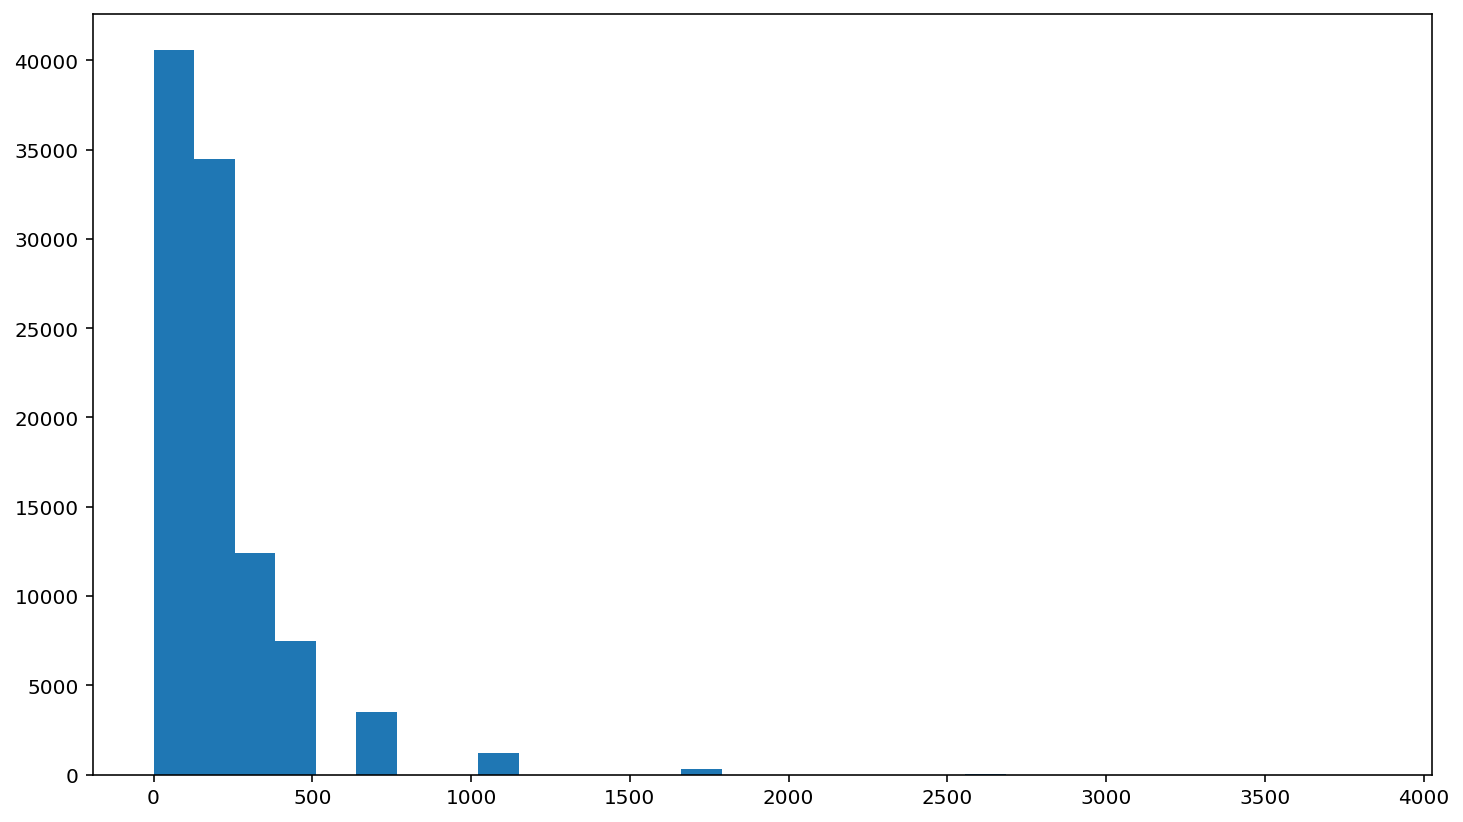

95% confidence interval
[ 29.54811716 757.28592443]


In [19]:
#kelly results
plt.hist(kelly_results, bins=30)
plt.show()
print('95% confidence interval')
print(np.percentile(kelly_results, (2.5, 97.5)))

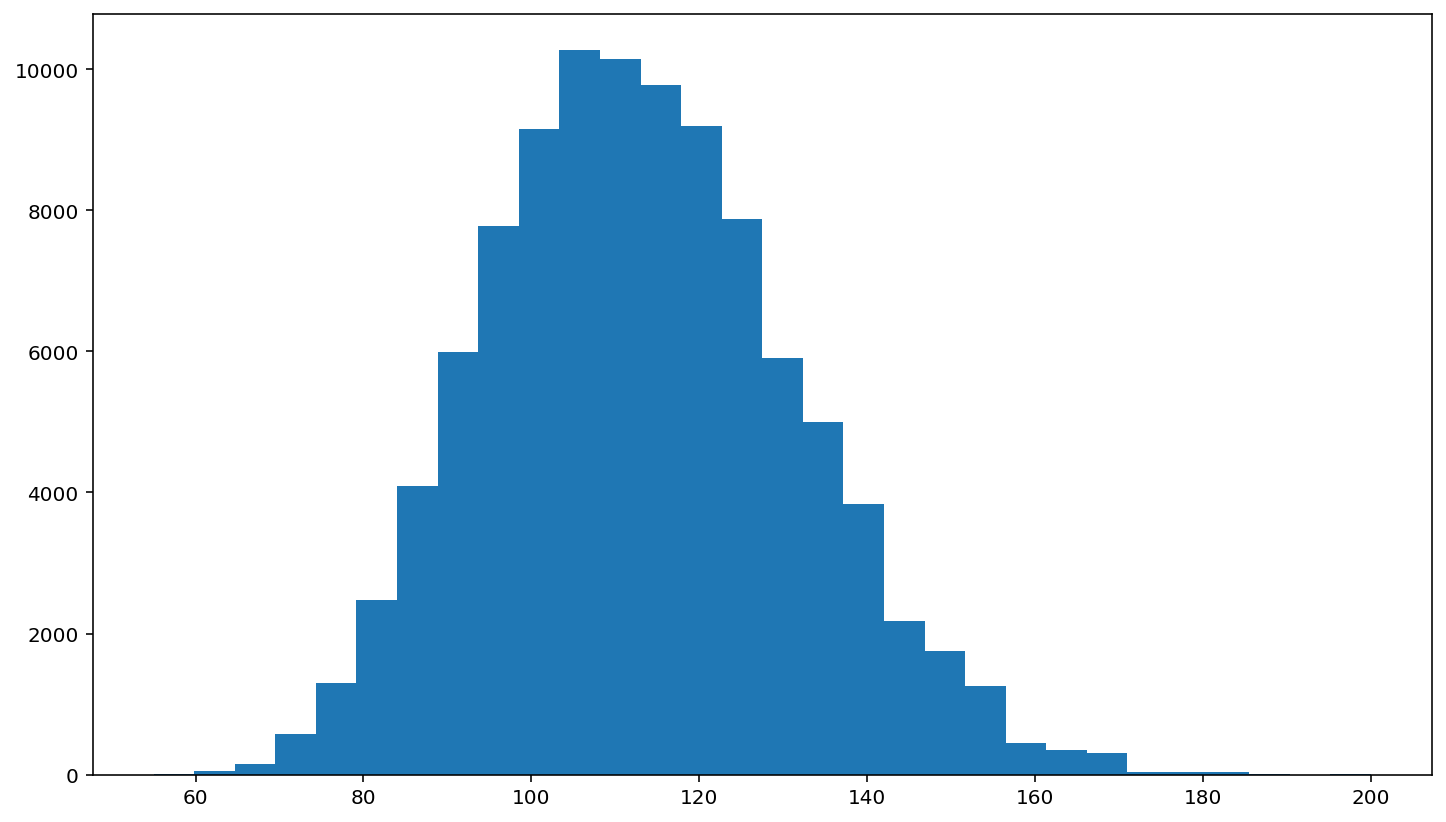

95% confidence interval
[ 80. 150.]


In [20]:
#edu results
plt.hist(edu_results, bins=30)
plt.show()
print('95% confidence interval')
print(np.percentile(edu_results, (2.5, 97.5)))

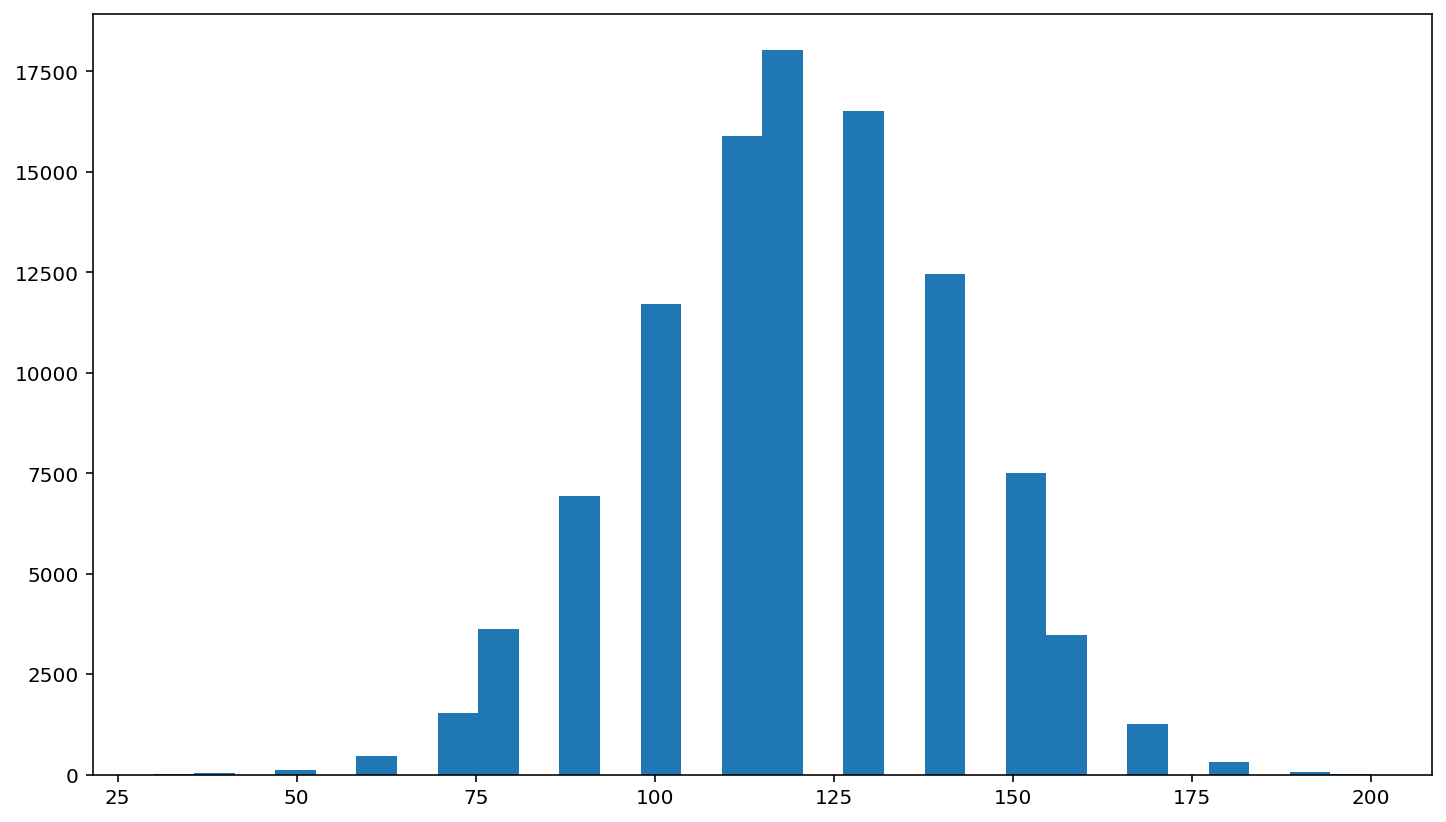

95% confidence interval
[ 80. 160.]


In [21]:
#fixed results
plt.hist(fixed_results, bins=30)
plt.show()
print('95% confidence interval')
print(np.percentile(fixed_results, (2.5, 97.5)))